In [1]:
import os 
import time
from boston_crime_vis import *

In [3]:
data = pd.read_csv('./data/crimedata.csv')

# Data description

In [4]:
data.describe()
#there are some -1 in lat and long

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,426840.000000,426840.000000,426840.000000,426840.000000,399636.000000,399636.000000
mean,2327.710208,2017.092395,6.646240,13.116903,42.221634,-70.920432
std,1181.575322,1.283726,3.279187,6.298602,2.084320,3.371579
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1102.000000,2016.000000,4.000000,9.000000,42.297105,-71.097223
50%,3001.000000,2017.000000,7.000000,14.000000,42.325538,-71.077619
75%,3201.000000,2018.000000,9.000000,18.000000,42.348546,-71.062583
max,3831.000000,2019.000000,12.000000,23.000000,42.395042,-1.000000


In [5]:
#preprocess data
df = process_crimedata(data)
df.head()

,OFFENSE_CODE_GROUP,DISTRICT,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long
0,Auto Theft,E18,N,2019-10-13 09:28:24,2019,10,Sunday,9,LINCOLN ST,42.259518,-71.121563
1,Auto Theft,E18,N,2019-10-12 20:11:26,2019,10,Saturday,20,METROPOLITAN AVE,42.262092,-71.116710
2,Auto Theft,D14,N,2019-10-12 15:12:43,2019,10,Saturday,15,ALLSTON ST,42.352375,-71.135096
3,Auto Theft,D4,N,2019-10-12 04:41:52,2019,10,Saturday,4,SAINT JAMES AVE,42.349476,-71.076402
4,Auto Theft,A15,N,2019-10-02 08:08:49,2019,10,Wednesday,8,N MEAD ST,42.381846,-71.066551


In [6]:
#the top 5 
df.OFFENSE_CODE_GROUP.value_counts()[:5]

Motor Vehicle Accident Response    40471
Larceny                            33610
Medical Assistance                 31105
Investigate Person                 23700
Other                              22575
Name: OFFENSE_CODE_GROUP, dtype: int64

In [7]:
#count the region numbers
print('the number of regions is', len(df['DISTRICT'].value_counts()))
print('the time range of the whole data set is from ', df['OCCURRED_ON_DATE'].min(), 'to', \
      df['OCCURRED_ON_DATE'].max())

the number of regions is 12
the time range of the whole data set is from  2015-06-15 00:00:00 to 2019-10-13 09:28:24


# EDA

{'Aggravated Assault': 0, 'Aircraft': 1, 'Arson': 2, 'Assembly or Gathering Violations': 3, 'Auto Theft': 4, 'Auto Theft Recovery': 5, 'Ballistics': 6, 'Biological Threat': 7, 'Bomb Hoax': 8, 'Burglary - No Property Taken': 9, 'Commercial Burglary': 10, 'Confidence Games': 11, 'Counterfeiting': 12, 'Criminal Harassment': 13, 'Disorderly Conduct': 14, 'Drug Violation': 15, 'Embezzlement': 16, 'Evading Fare': 17, 'Explosives': 18, 'Fire Related Reports': 19, 'Firearm Discovery': 20, 'Firearm Violations': 21, 'Fraud': 22, 'Gambling': 23, 'HOME INVASION': 24, 'Harassment': 25, 'Harbor Related Incidents': 26, 'Homicide': 27, 'Human Trafficking': 28, 'Investigate Person': 29, 'Investigate Property': 30, 'Involuntary Servitude': 31, 'Landlord/Tenant Disputes': 32, 'Larceny': 33, 'Larceny From Motor Vehicle': 34, 'License Plate Related Incidents': 35, 'License Violation': 36, 'Liquor Violation': 37, 'Manslaughter': 38, 'Medical Assistance': 39, 'Missing Person Located': 40, 'Missing Person Rep

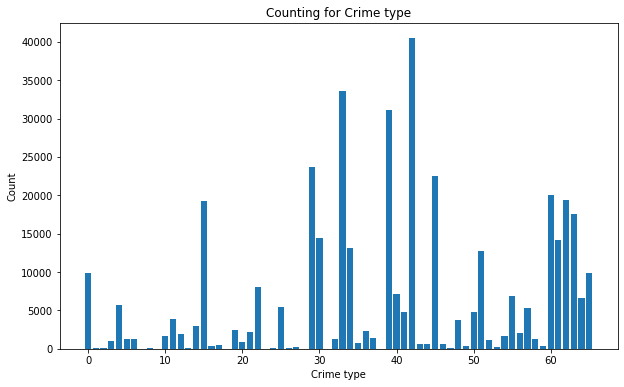

In [7]:
feature_overview(df, 'crime_type', True)

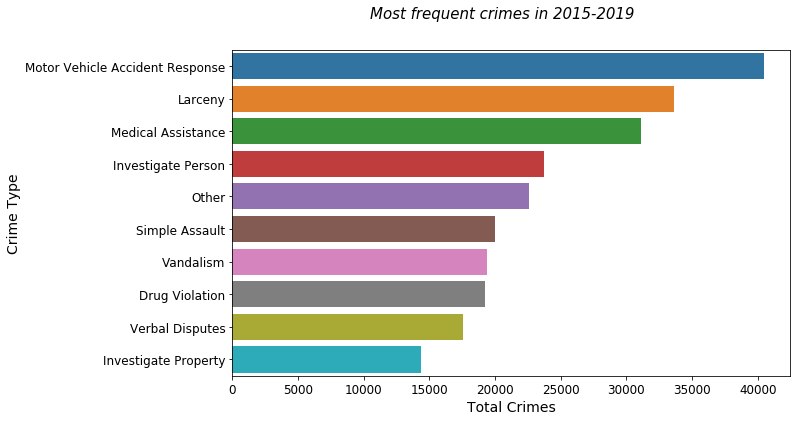

In [8]:
feature_overview(df, 'crime_type_top10', True)

In [8]:
geomap(df, 2019, save=True)

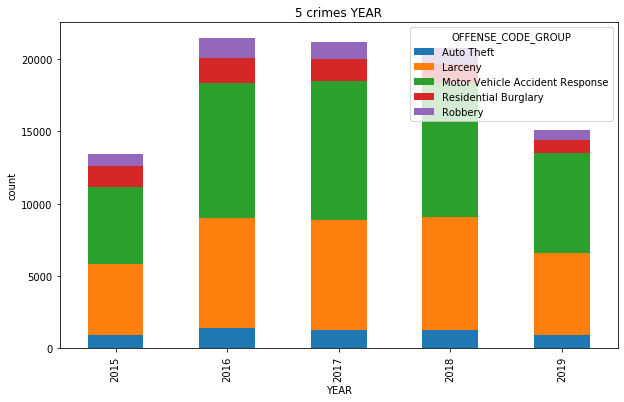

In [11]:
crimes5_overview(df, 'YEAR', save = True)

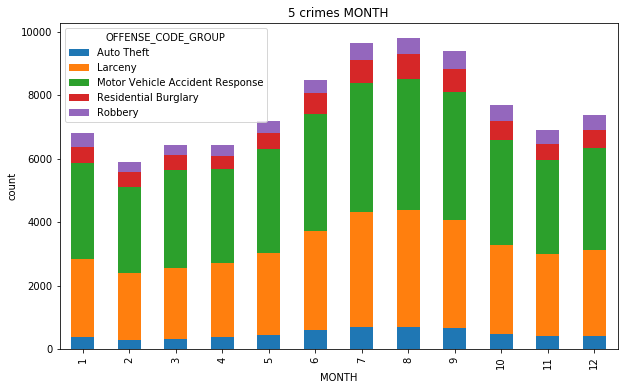

In [12]:
crimes5_overview(df, 'MONTH', save = True)

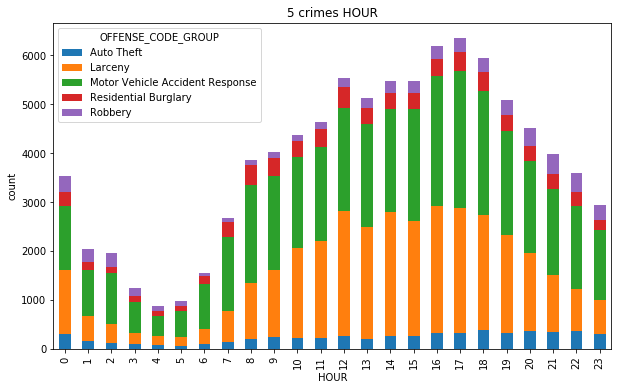

In [13]:
crimes5_overview(df, 'HOUR', save = True)

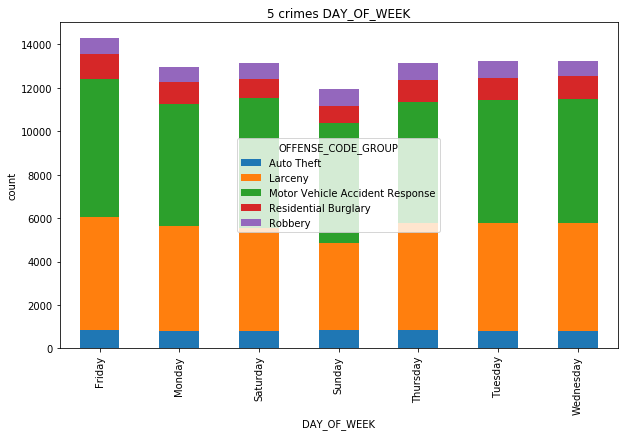

In [14]:
crimes5_overview(df, 'DAY_OF_WEEK', save = True)

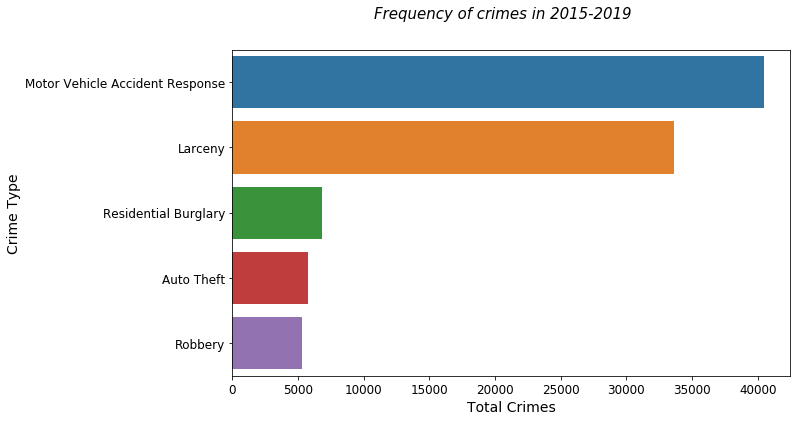

In [8]:
plt.figure(figsize = (10,6))
top5= ['Auto Theft',
 'Motor Vehicle Accident Response',
 'Larceny',
 'Robbery',
 'Residential Burglary']

predict_df = df[df["OFFENSE_CODE_GROUP"].isin(top5)]

sns.countplot(y = predict_df["OFFENSE_CODE_GROUP"],order=predict_df["OFFENSE_CODE_GROUP"].value_counts().index)
plt.suptitle("Frequency of crimes in 2015-2019", fontsize=15, fontweight=0, color='black', style='italic')
plt.ylabel("Crime Type", fontsize=14)
plt.xlabel("Total Crimes", fontsize=14)
plt.tick_params(labelsize=12)